In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob

# import scipy as sp

In [19]:
ddict_name = glob.glob("/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_*.nc")
ddict_name

['/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_1940-1959.nc',
 '/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_1960-1979.nc',
 '/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_1980-1999.nc',
 '/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_2000-2019.nc',
 '/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_2020-2024.nc']

In [20]:
ddict = []
for ds in ddict_name:
    ds = xr.open_dataset(ds)
    ddict.append(ds)
ddict

[<xarray.Dataset> Size: 216MB
 Dimensions:     (valid_time: 44160, latitude: 29, longitude: 21)
 Coordinates:
     number      int64 8B ...
   * valid_time  (valid_time) datetime64[ns] 353kB 1940-06-01 ... 1959-08-31T2...
   * latitude    (latitude) float64 232B 43.0 42.75 42.5 ... 36.5 36.25 36.0
   * longitude   (longitude) float64 168B -92.0 -91.75 -91.5 ... -87.25 -87.0
     expver      (valid_time) <U4 707kB ...
 Data variables:
     d2m         (valid_time, latitude, longitude) float32 108MB ...
     t2m         (valid_time, latitude, longitude) float32 108MB ...
 Attributes:
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     history:                 2024-12-04T06:37 GRIB to CDM+CF via cfgrib-0.9.1...,
 <xarray.Dataset> Size: 205MB
 Dimensions:     (valid_time: 41

In [21]:
full_ds = xr.concat(ddict, dim='valid_time')

In [7]:
ds = xr.open_dataset("/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/tmp_era5_hr_1940-1959.nc")

In [4]:
ds = xr.open_dataset("/data/cristi/a/kchoo3/ERA5/reanalysis/hourly_1940-now/test_accum.nc")

In [6]:
full_ds

<xarray.Dataset> Size: 908MB
Dimensions:     (valid_time: 185472, latitude: 29, longitude: 21)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 1MB 1940-06-01 ... 2024-08-31T23:...
  * latitude    (latitude) float64 232B 43.0 42.75 42.5 ... 36.5 36.25 36.0
  * longitude   (longitude) float64 168B -92.0 -91.75 -91.5 ... -87.25 -87.0
    expver      (valid_time) <U4 3MB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    d2m         (valid_time, latitude, longitude) float32 452MB 286.1 ... 297.7
    t2m         (valid_time, latitude, longitude) float32 452MB 293.8 ... 299.7
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-04T06:37 GRIB to CDM+CF via cfgrib-0.9.1...

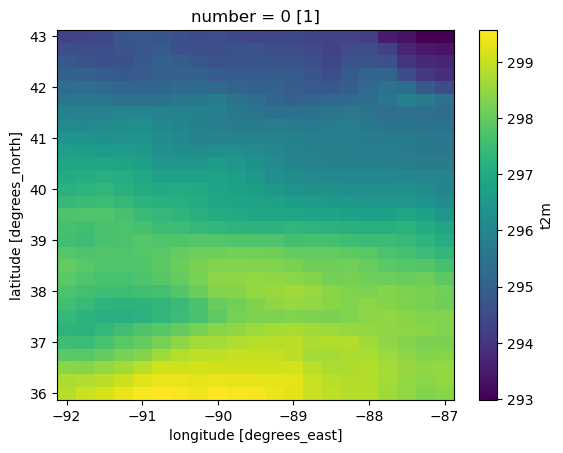

In [23]:
full_ds.t2m.mean(dim=['valid_time']).plot()

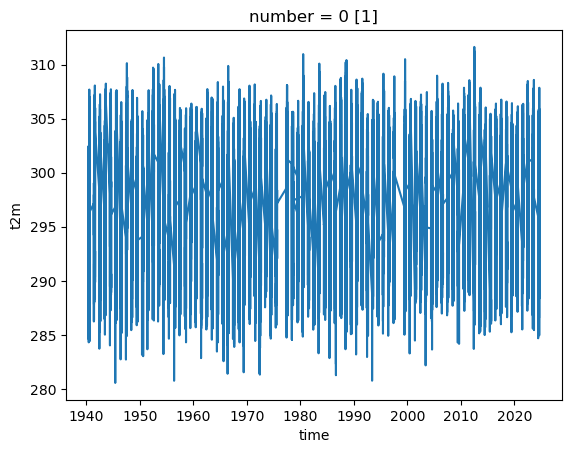

In [25]:
full_ds.t2m.mean(dim=['latitude','longitude']).plot()

### Downloading Data below

In [ ]:
import cdsapi

i = 1946

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "2m_dewpoint_temperature",
        "2m_temperature",
        "surface_net_solar_radiation",
        "surface_net_thermal_radiation",
        "top_net_solar_radiation",
        "top_net_thermal_radiation"
    ],
    "year": [i],
    "month": ["06", "07", "08"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request)

2024-12-03 17:35:20,306 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-03 17:35:20,307 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-03 17:35:20,308 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-03 17:35:20,309 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

In [10]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "2m_dewpoint_temperature",
        "2m_temperature"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024"
    ],
    "month": ["06", "07", "08"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": ["09:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [40.25, -88.25, 40, -88]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2024-12-03 22:02:57,315 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-03 22:02:57,317 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-03 22:02:57,318 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-03 22:02:57,320 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

HTTPError: 403 Client Error: Forbidden for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
cost limits exceeded
Your request is too large, please reduce your selection.